# CRISP-DM: Data Understanding

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
bdm = pd.read_excel('BDM.xlsx')
final_excel = pd.read_excel('previous_project_results.xlsx')
final_excel = final_excel.merge(
bdm[['AdNumber', 'BDM']], 
on='AdNumber', 
how='left',
suffixes=('_old', '')
).drop('BDM_old', axis=1, errors='ignore')
correlation = final_excel

sns.set(style="whitegrid")

colors = ['#AFCAE2', '#F1BEA1', '#5694CE', '#E4E1DA', '#A4CD91', '#C6D6C5']

### 3. 1 Visualization of Background Data

#### 3. 1. 1 Ads with vs. without BDM

C:\Users\Huawei\AppData\Local\Temp\ipykernel_44960\997075952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bdm_counts.index, y=bdm_counts.values, palette=colors)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_44960\997075952.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=bdm_counts.index, y=bdm_counts.values, palette=colors)


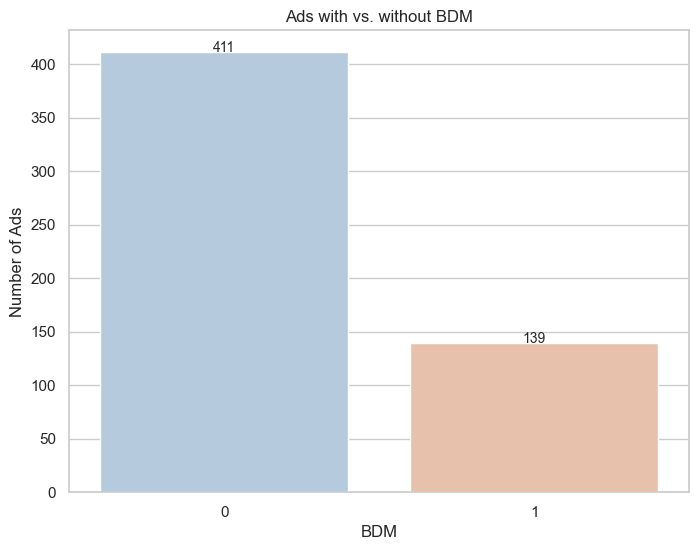

In [59]:

sns.set(style="whitegrid")

bdm_counts = bdm['BDM'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=bdm_counts.index, y=bdm_counts.values, palette=colors)
# Annotate each bar with the count value
for index, value in enumerate(bdm_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)
plt.xlabel('BDM')
plt.ylabel('Number of Ads')
plt.title('Ads with vs. without BDM')
plt.show()

#### 3. 1. 2 Ads per Year with BDM Classification

C:\Users\Huawei\AppData\Local\Temp\ipykernel_44960\1198260362.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_bdm_counts = bdm.groupby(['Year', 'BDM']).size().unstack(fill_value=0)


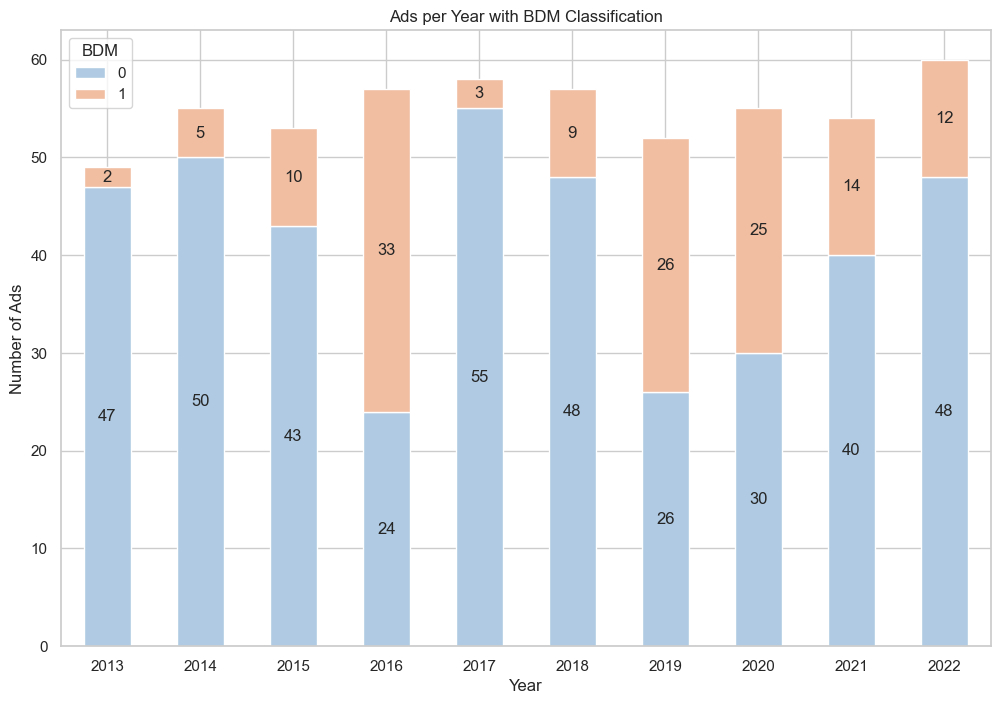

In [60]:
# Make sure the 'BDM' column is a categorical type
bdm['Year'] = pd.Categorical(bdm['Year'], categories=sorted(bdm['Year'].unique()), ordered=True)

# Count the number of ads per year and BDM
year_bdm_counts = bdm.groupby(['Year', 'BDM']).size().unstack(fill_value=0)

# Visualize the number of ads per year and BDM
ax = year_bdm_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.xlabel('Year')
plt.ylabel('Number of Ads')
plt.title('Ads per Year with BDM Classification')
plt.legend(title='BDM')
plt.xticks(rotation=0)  # rotate x-axis labels

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

#### 3. 1. 3 Top 10 Brands by Percentage of Ads with BDM

Total number of unique brands: 301


C:\Users\Huawei\AppData\Local\Temp\ipykernel_44960\3020717119.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=top_10_sponsor_bdm.index, x=top_10_sponsor_bdm['BDM%'], palette=colors, order=top_10_sponsor_bdm.index)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_44960\3020717119.py:16: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(y=top_10_sponsor_bdm.index, x=top_10_sponsor_bdm['BDM%'], palette=colors, order=top_10_sponsor_bdm.index)


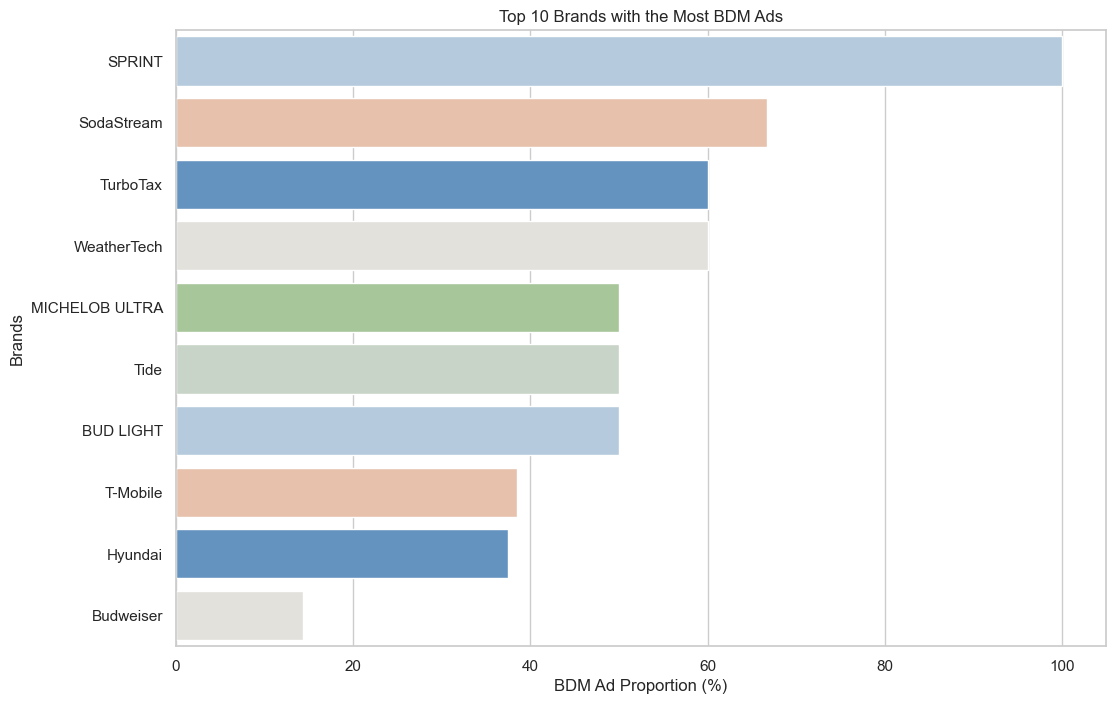

In [61]:
# Calculate the number of ads per brand and the number of BDM ads
sponsor_bdm = bdm.groupby('Sponsor')['BDM'].agg(['count', 'sum'])
sponsor_bdm['BDM%'] = sponsor_bdm['sum'] / sponsor_bdm['count'] * 100
sponsor_bdm = sponsor_bdm.sort_values(by='sum', ascending=False)

# Calculate the number of unique brands
num_brands = bdm['Sponsor'].nunique()
print(f'Total number of unique brands: {num_brands}')


# Select the top 10 brands by the number of BDM ads and sort by BDM% in descending order
top_10_sponsor_bdm = sponsor_bdm.head(10).sort_values(by='BDM%', ascending=False)

# Plot bar chart with bars sorted by BDM% in descending order
plt.figure(figsize=(12, 8))
barplot = sns.barplot(y=top_10_sponsor_bdm.index, x=top_10_sponsor_bdm['BDM%'], palette=colors, order=top_10_sponsor_bdm.index)


plt.xlabel('BDM Ad Proportion (%)')
plt.ylabel('Brands')
plt.title('Top 10 Brands with the Most BDM Ads')
plt.show()





Total number of brands: 301


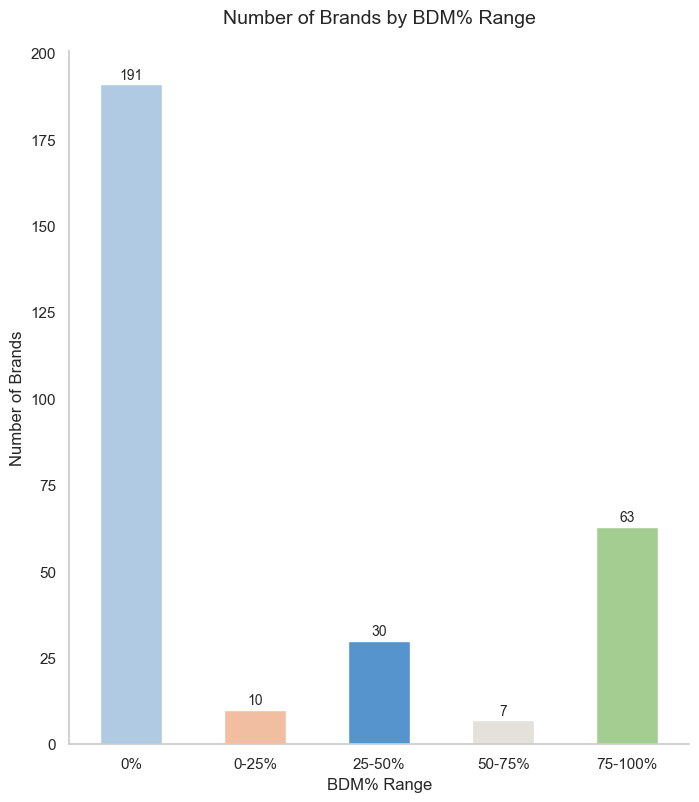

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd

# Define the bins and labels for BDM% ranges
bins = [-0.01, 0, 25, 50, 75, 100]  # Define the bin edges
labels = ['0%', '0-25%', '25-50%', '50-75%', '75-100%']  # Define the bin labels

# Divide the BDM% into ranges
sponsor_bdm['BDM_Range'] = pd.cut(sponsor_bdm['BDM%'], bins=bins, labels=labels, right=True)

# Calculate the number of brands in each BDM% range
bdm_counts = sponsor_bdm['BDM_Range'].value_counts().sort_index()

# Calculate the total number of brands
total_brands = sponsor_bdm.index.nunique()
print(f'Total number of brands: {total_brands}')

# Draw the bar chart
plt.figure(figsize=(8, 9))
ax = bdm_counts.plot(kind='bar', color=colors)

# Print the number of brands on top of the bars
for i, value in enumerate(bdm_counts):
    ax.text(i, value + 0.5, f'{int(value)}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Number of Brands by BDM% Range', fontsize=14, pad=20)
plt.xlabel('BDM% Range')
plt.ylabel('Number of Brands')
plt.xticks(rotation=0)

# Remove the grid
plt.grid(False)

# Remove the top and right spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


#### 3. 1. 4 Top 4 Product Types by Percentage of Ads with BDM

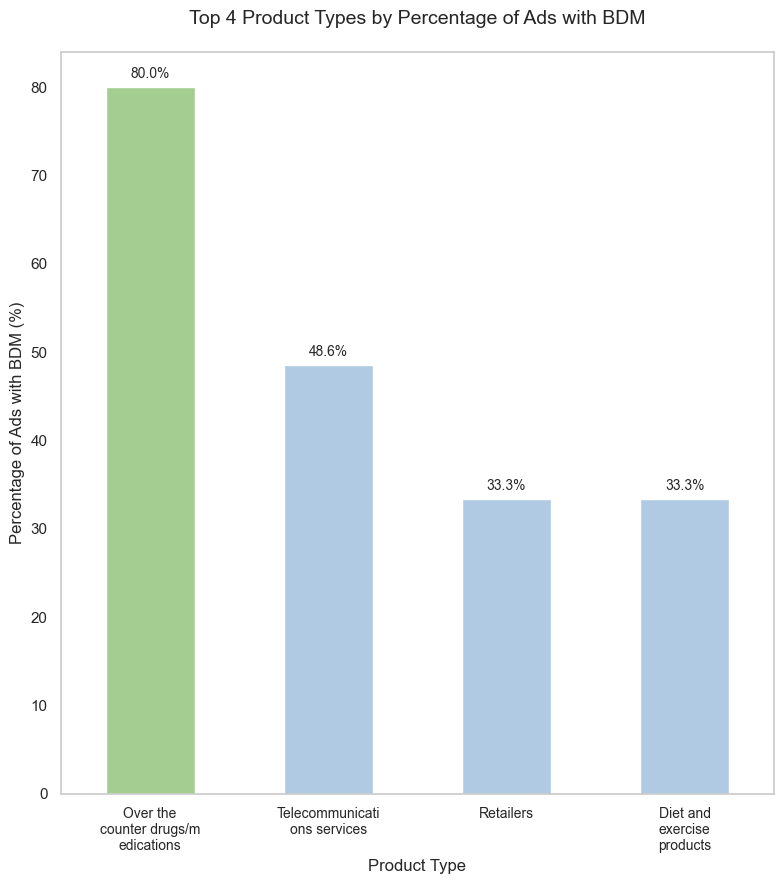

In [63]:
import matplotlib.pyplot as plt
import textwrap
# Replace numeric codes with corresponding product type names
product_mapping = {
    1: "Food and beverages",
    2: "Alcoholic beverages",
    3: "Tobacco products",
    4: "Automobile and automobile related",
    5: "Over the counter drugs/medications",
    6: "Household and lawn and garden supplies",
    7: "Electronic appliances/products",
    8: "Cosmetics and personal care products",
    9: "Diet and exercise products",
    10: "Clothing, shoes and apparel",
    11: "Furniture",
    12: "Entertainment and entertainment supplies",
    13: "Home computers and computer supplies",
    14: "Office equipment and supplies",
    15: "Sporting goods, toys and games",
    16: "Pets, pet food and pet supplies",
    17: "Publications",
    18: "Movies",
    19: "Retailers",
    20: "Banking and financial services",
    21: "Telecommunications services",
    22: "Transportation services",
    23: "Nonprofit organizations",
    24: "Miscellaneous products",
    25: "Miscellaneous services",
}

# Replace the numeric values in cont_primary_product_type with the corresponding product names
correlation["cont_primary_product_type"] = correlation["cont_primary_product_type"].map(product_mapping)

# Calculate the percentage of BDM ads for each product type
bdm_percentages = (
    correlation.groupby("cont_primary_product_type")["BDM"].mean() * 100
).sort_values(ascending=False)

# Select the top 10 product types with the highest BDM percentages
top_4_products = bdm_percentages.head(4)

# Plot the bar chart
colors1 = ['#A4CD91' if value == top_4_products.max() else '#AFCAE2' for value in top_4_products]

plt.figure(figsize=(8, 9))
bars = top_4_products.plot(kind="bar", color=colors1)

# Add percentage values on top of each bar
for index, value in enumerate(top_4_products):
    plt.text(index, value + 1, f"{value:.1f}%", ha="center", fontsize=10)
wrapped_labels = [textwrap.fill(label, 15) for label in top_4_products.index]
# Customize the chart
plt.title("Top 4 Product Types by Percentage of Ads with BDM", fontsize=14, pad=20)
plt.ylabel("Percentage of Ads with BDM (%)", fontsize=12)
plt.xlabel("Product Type", fontsize=12)
plt.xticks(range(len(wrapped_labels)), wrapped_labels, rotation=0, ha="center", fontsize=10)
plt.tight_layout()
# Remove the grid
plt.grid(False)

# Remove the top and right spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


## 3.2  Data Visualization for Potential Correlations

### 3.2.1 Commercial Characters Celebrities vs. BDM

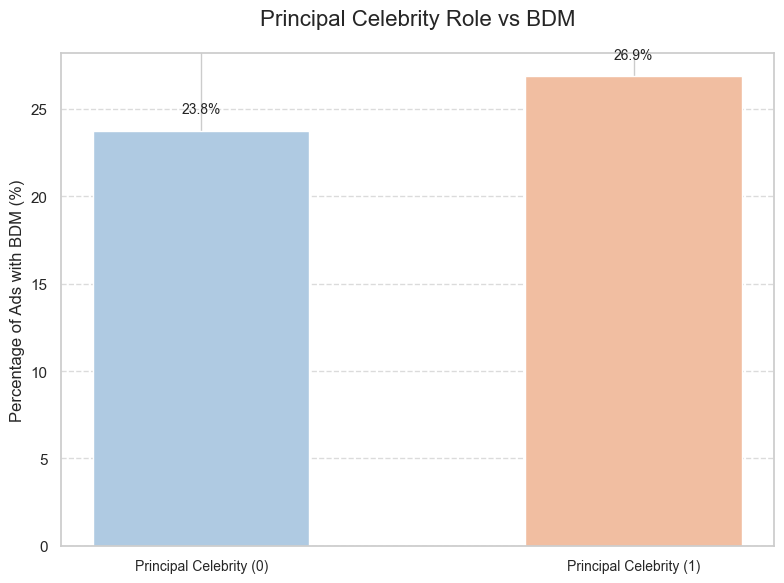

In [64]:

import matplotlib.pyplot as plt
import pandas as pd

# Define the variable group for Principal Celebrity Role
main_role_column = {"cont_celeb_main": "Principal Celebrity"}

# Function to calculate percentages
def calculate_percentage(data, column):
    # Calculate the percentage of ads with BDM (BDM=1) for column value 1
    filtered_1 = data[data[column] == 1]
    percentage_1 = (filtered_1["BDM"].sum() / len(filtered_1)) * 100 if len(filtered_1) > 0 else 0
    
    # Calculate the percentage of ads with BDM (BDM=1) for column value 0
    filtered_0 = data[data[column] == 0]
    percentage_0 = (filtered_0["BDM"].sum() / len(filtered_0)) * 100 if len(filtered_0) > 0 else 0
    
    return percentage_0, percentage_1

# Function to plot a bar chart with percentage annotations
def plot_bar_with_percentage(data, title, x_labels):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(data)), data.values, color=colors, width=0.5)
    
    # Annotate percentages on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",  # Display percentage with one decimal
            ha="center",
            fontsize=10
        )

    # Customize the chart
    plt.title(title, fontsize=16, pad=20)  # Add padding to move the title up
    plt.ylabel("Percentage of Ads with BDM (%)", fontsize=12)
    plt.xticks(ticks=range(len(data)), labels=x_labels, fontsize=10, rotation=0)
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


# Calculate percentages for Principal Celebrity Role
main_role_percentages = {
    f"{label} (0)": calculate_percentage(correlation, col)[0] for col, label in main_role_column.items()
}
main_role_percentages.update({
    f"{label} (1)": calculate_percentage(correlation, col)[1] for col, label in main_role_column.items()
})

# Plot the bar chart
plot_bar_with_percentage(
    pd.Series(main_role_percentages),
    "Principal Celebrity Role vs BDM",
    list(main_role_percentages.keys()),
)

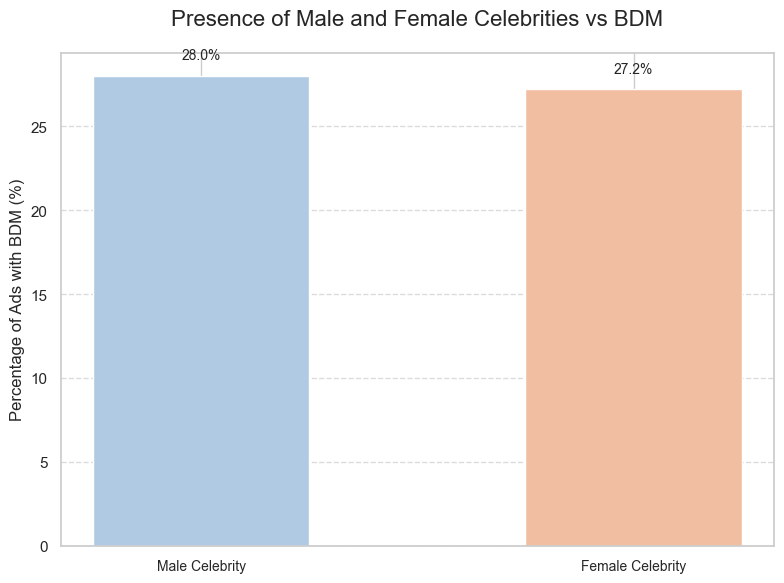

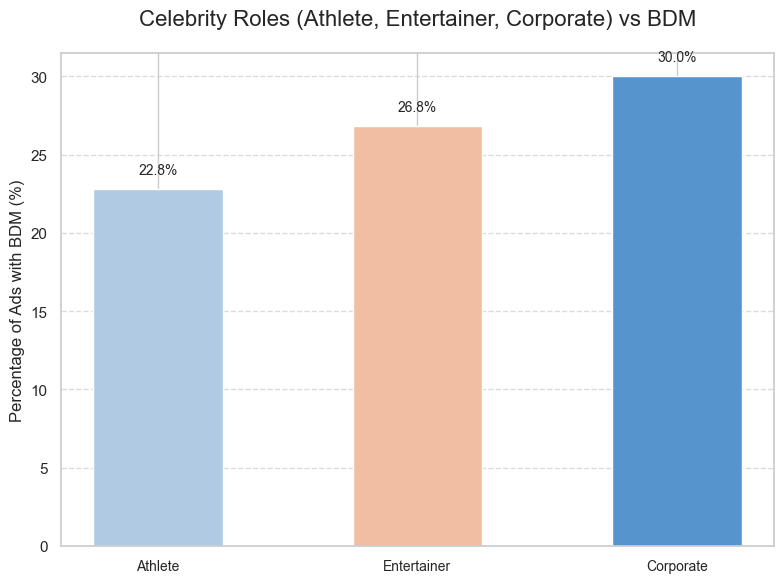

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Define variable groups
gender_columns = {"cont_celeb_male": "Male Celebrity", "cont_celeb_female": "Female Celebrity"}
role_columns = {
    "cont_celeb_athlete": "Athlete",
    "cont_celeb_entertain": "Entertainer",
    "cont_celeb_corporate": "Corporate",
}


# Function to calculate percentages
def calculate_percentage(data, column):
    # Filter rows where the column value is 1
    filtered = data[data[column] == 1]
    # Calculate the percentage of ads with BDM (BDM=1)
    percentage = (filtered["BDM"].sum() / len(filtered)) * 100
    return percentage

# Function to plot a bar chart with percentage annotations
def plot_bar_with_percentage(data, title, x_labels):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(data)), data.values, color=colors, width=0.5)
    
    # Annotate percentages on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",  # Display percentage with one decimal
            ha="center",
            fontsize=10
        )

    # Customize the chart
    plt.title(title, fontsize=16, pad=20)  # Add padding to move the title up
    plt.ylabel("Percentage of Ads with BDM (%)", fontsize=12)

    plt.xticks(ticks=range(len(data)), labels=x_labels, fontsize=10, rotation=0)
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


# Calculate percentages for Male and Female Celebrities
gender_percentages = {
    label: calculate_percentage(correlation, col) for col, label in gender_columns.items()
}
plot_bar_with_percentage(
    pd.Series(gender_percentages),
    "Presence of Male and Female Celebrities vs BDM",
    list(gender_percentages.keys()),
)

# Calculate percentages for Celebrity Roles (Athlete, Entertainer, Corporate)
role_percentages = {
    label: calculate_percentage(correlation, col) for col, label in role_columns.items()
}
plot_bar_with_percentage(
    pd.Series(role_percentages),
    "Celebrity Roles (Athlete, Entertainer, Corporate) vs BDM",
    list(role_percentages.keys()),
)

### 3.2.2 Humor vs. BDM

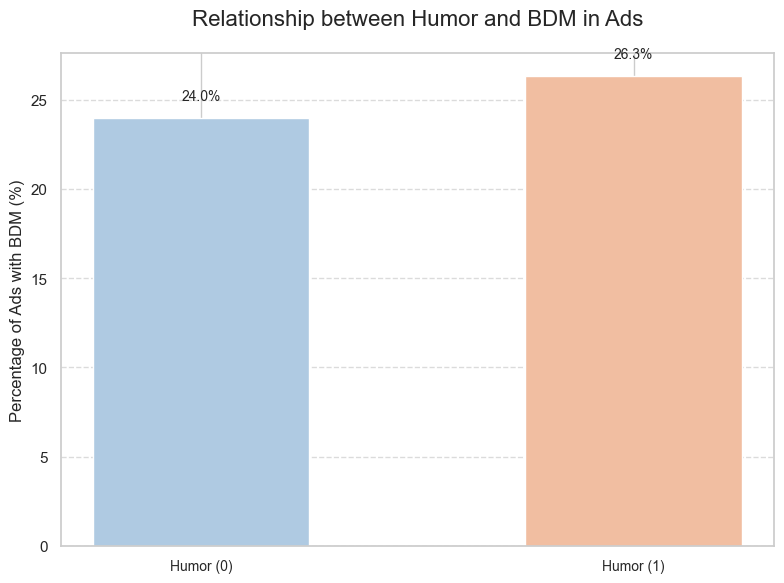

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the variable group for Humor
humor_column = {"cont_humor": "Humor"}

# Function to calculate percentages
def calculate_percentage(data, column):
    # Calculate the percentage of ads with BDM (BDM=1) for column value 1
    filtered_1 = data[data[column] == 1]
    percentage_1 = (filtered_1["BDM"].sum() / len(filtered_1)) * 100 if len(filtered_1) > 0 else 0
    
    # Calculate the percentage of ads with BDM (BDM=1) for column value 0
    filtered_0 = data[data[column] == 0]
    percentage_0 = (filtered_0["BDM"].sum() / len(filtered_0)) * 100 if len(filtered_0) > 0 else 0
    
    return percentage_0, percentage_1

# Function to plot a bar chart with percentage annotations
def plot_bar_with_percentage(data, title, x_labels):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(data)), data.values, color=colors, width=0.5)
    
    # Annotate percentages on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",  # Display percentage with one decimal
            ha="center",
            fontsize=10
        )

    # Customize the chart
    plt.title(title, fontsize=16, pad=20)  # Add padding to move the title up
    plt.ylabel("Percentage of Ads with BDM (%)", fontsize=12)
    plt.xticks(ticks=range(len(data)), labels=x_labels, fontsize=10, rotation=0)
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


# Calculate percentages for Humor
humor_percentages = {
    f"{label} (0)": calculate_percentage(correlation, col)[0] for col, label in humor_column.items()
}
humor_percentages.update({
    f"{label} (1)": calculate_percentage(correlation, col)[1] for col, label in humor_column.items()
})

# Plot the bar chart
plot_bar_with_percentage(
    pd.Series(humor_percentages),
    "Relationship between Humor and BDM in Ads",
    list(humor_percentages.keys()),
)

### 3.2.3 Corporate Social Responsibility (CSR)

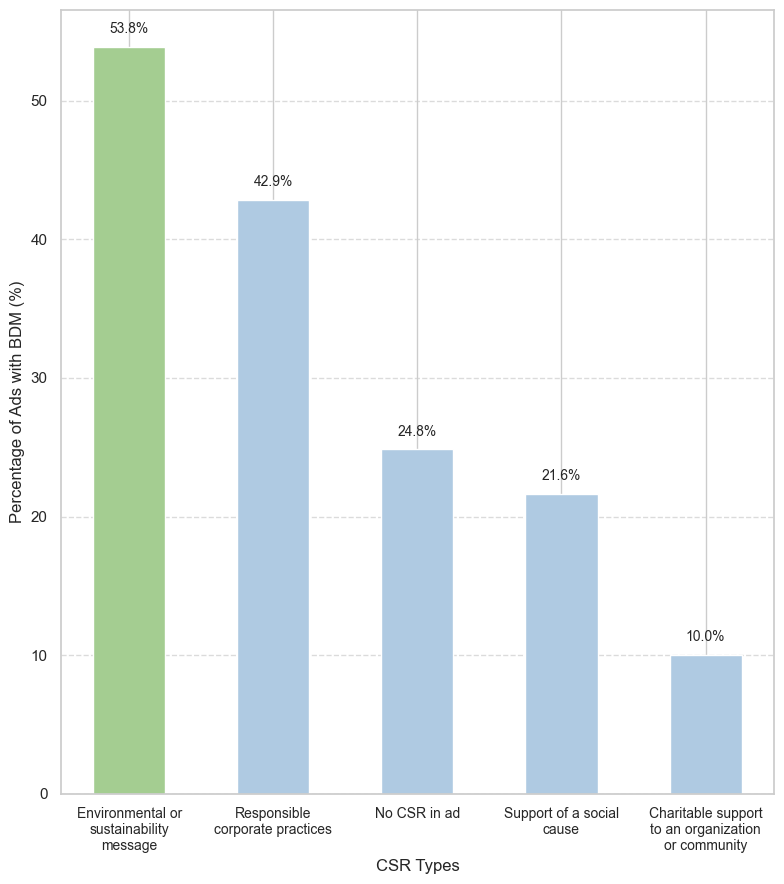

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Define the variable group for CSR types
csr_columns = {
    0: "No CSR in ad",
    1: "Environmental or sustainability message",
    2: "Charitable support to an organization or community",
    3: "Support of a social cause",
    4: "Responsible corporate practices"
}

# Function to calculate percentages
def calculate_csr_percentage(data, column):
    percentages = {}
    for value, label in csr_columns.items():
        filtered = data[data[column] == value]
        percentage = (filtered["BDM"].sum() / len(filtered)) * 100 if len(filtered) > 0 else 0
        percentages[label] = percentage
    return percentages

# Function to plot a bar chart with percentage annotations
def plot_bar_with_percentage(data, title, x_labels):
    plt.figure(figsize=(8, 9))
    colors2 = ['#A4CD91' if value == max(data) else '#AFCAE2' for value in data]

    bars = plt.bar(range(len(data)), data.values, color=colors2, width=0.5)
    
    # Annotate percentages on each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",  # Display percentage with one decimal
            ha="center",
            fontsize=10
        )

    # Customize the chart
    wrapped_labels1 = [textwrap.fill(label, 20) for label in x_labels]
    plt.title(title, fontsize=16, pad=20)  # Add padding to move the title up
    plt.ylabel("Percentage of Ads with BDM (%)", fontsize=12)
    plt.xlabel("CSR Types", fontsize=12)
    plt.xticks(ticks=range(len(data)), labels=wrapped_labels1, fontsize=10, rotation=0, ha="center")
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Calculate percentages for CSR types and sort them in descending order
csr_percentages = calculate_csr_percentage(correlation, "cont_csr_type")
csr_percentages_sorted = pd.Series(csr_percentages).sort_values(ascending=False)  # Sort percentages in descending order

# Plot the bar chart
plot_bar_with_percentage(
    csr_percentages_sorted,
    "BDM Percentage by CSR Type in Ads",
   
    list(csr_percentages_sorted.index)  # Use sorted labels
)

### 3.2.4 Heatmap - Correlation of Prominence of Product/Package in Ad and Commercial Approach with BDM


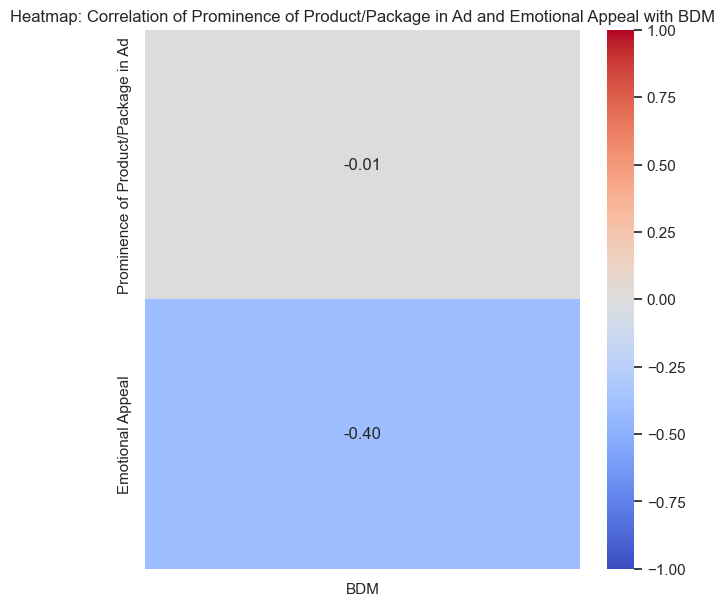

In [68]:

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Columns to be used
selected_columns = ['cont_product', 'cont_com_appeal', 'BDM']

# Data type conversion
for column in selected_columns:
    correlation[column] = pd.to_numeric(correlation[column], errors='coerce')

# Rename columns for better readability
correlation = correlation.rename(columns={
    'cont_product': 'Prominence of Product/Package in Ad',
    'cont_com_appeal': 'Emotional Appeal',
})

# Calculate the correlation matrix
correlation_matrix = correlation[['Prominence of Product/Package in Ad', 'Emotional Appeal', 'BDM']].corr()

# Extract the correlation of the target variable with other variables
target_correlation = correlation_matrix[['BDM']].drop('BDM')

# Draw the heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(target_correlation, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 12}, vmin=-1, vmax=1)
plt.title("Heatmap: Correlation of Prominence of Product/Package in Ad and Emotional Appeal with BDM")
plt.show()
